# 1. Аналитика

### Импорт библиотек и чтение данных

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
q1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/query_1.csv')
q3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/query_3.csv')

### Ознакомление с данными

In [4]:
q1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
q3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


##### Пропущенные значения отсутствуют. Типы данных определены корректно.

### Приведём названия городов к нижнему регистру

In [8]:
q3['city'] = q3['city'].str.lower()

In [9]:
print(q1.duplicated().sum())
print(q3.duplicated().sum())

0
0


##### Дубликаты отсутсвуют.

### Топ-10 городов по количеству рейсов

In [10]:
q3.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,москва,129.774194
70,санкт-петербург,31.161290
54,новосибирск,17.322581
33,красноярск,11.580645
20,екатеринбург,11.322581
67,ростов-на-дону,10.193548
63,пермь,10.129032
10,брянск,10.000000
74,сочи,9.612903
84,ульяновск,9.580645


## Графики

### ТОП-10 городов по количеству рейсов

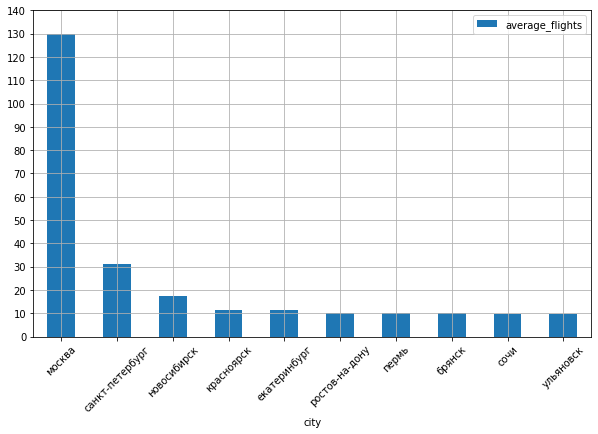

In [11]:
q3.sort_values('average_flights', ascending=False).head(10).plot(x='city',y='average_flights',kind='bar',ylim=(0, 140),yticks=[0 + i for i in range(0, 150, 10)],rot=45,grid=True,figsize=(10, 6))

##### Вывод: видим, что наибольшее количество рейсов приходится в столицу страны, на города-миллионники, курортный город и крупные города местного значения.

### Модели самолетов и количество рейсов

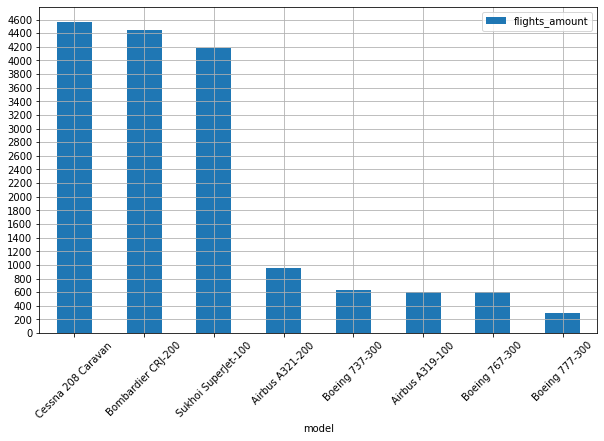

In [12]:
q1.sort_values('flights_amount',ascending=False).plot(x='model',y='flights_amount',kind='bar',yticks=[0 + i for i in range(0, 4800, 200)],rot=45,grid=True,figsize=(10, 6))

##### Вывод: Количество полётов для каждой модели отсортировано по убыванию. Из графика также видно, что модели самолётов выстроились по возрастанию количества пассажиров на борту. Cessna 208 Caravan - вместимость порядка 9 пассажиров - 4557 полётов, Bombardier CRJ-200 - около 50 пассижиров - 4446 полётов,  Boeing 767-300 - от 218 до 350 пассажиров - 600 полётов, Boeing 777-300	- от 305 до 550 пассажиров - 300 полётов.

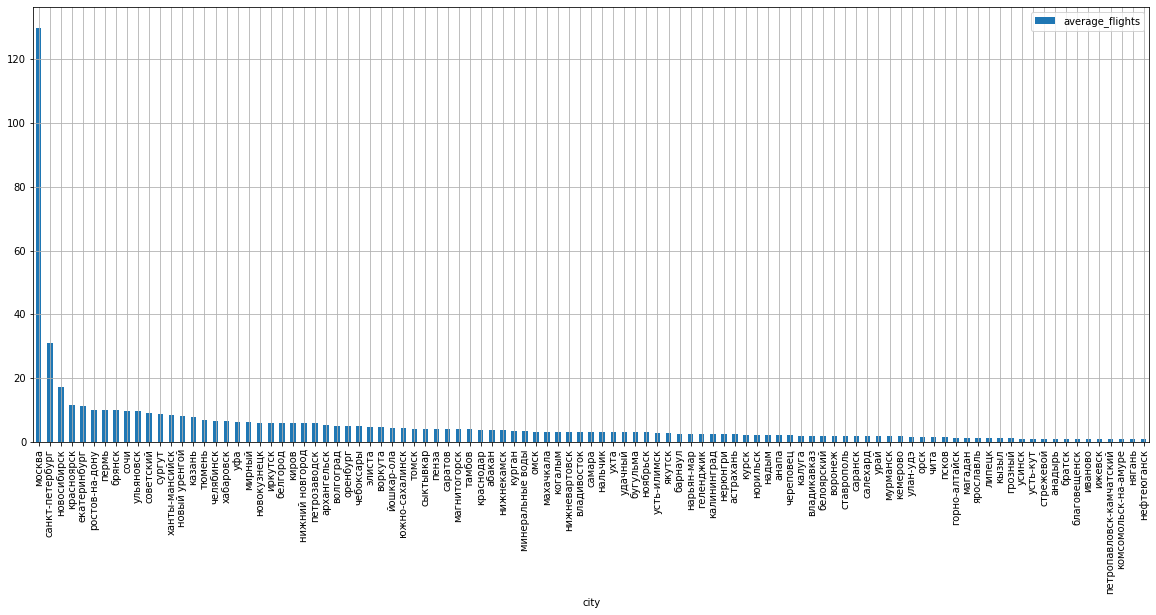

In [13]:
q3.sort_values('average_flights',ascending=False).plot(x='city',y='average_flights',kind='bar',grid=True,figsize=(20, 8))

##### Вывод: Среднее количество рейсов в столицу страны максимальное и больше в несколько раз. Из графика видно, что среднее количество снижается по мере географического удаления от столицы на восток.

# 2. Проверка гипотезы

In [14]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/query_last.csv')

In [15]:
df.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [16]:
df[df['festival_name'].isna()]['ticket_amount'].count()

7

In [17]:
df[~df['festival_name'].isna()]['ticket_amount'].count()

3

##### 7 недель без фестивалей и 3 недели с фестивалями. Выборки, слишком маленькие и достоверно понять по ним что-то трудно. Не уверен в правильности, на мой взгляд надо использовать bootstrap для создания достаточной величины выборок, предположим, по 1000 значений.

### Рассчитаем средний спрос.

In [18]:
avg_ordinary = df[df['festival_name'].isna()]['ticket_amount'].mean()
avg_ordinary

51530.857142857145

In [19]:
avg_festival = df[~df['festival_name'].isna()]['ticket_amount'].mean()
avg_festival

48662.666666666664

### Подготовим данные для сравнения выборок.

In [20]:
ordinary = df[df['festival_name'].isna()]['ticket_amount']
festival = df[~df['festival_name'].isna()]['ticket_amount']

### Видим, что среднее значение количества билетов во время фестивалей меньше, чем когда фестивалей нет.

### Формулирование гипотезы:
H0 - Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время.  
H1 - Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время (уменьшился).  
  
Формулирование нулевой гипотезы H0 происходит в соответствии с правилом, что средние двух выборок равные. H1, соответственно, отличаются. Для проверки гипотез будем использовать t-test Стьюдента.

### Проверяем гипотезу о равенстве средних значений двух выборок, используя bootstrap.

In [22]:
ordinary_btsrp = ordinary.sample(n=1000, replace=True, random_state=12345)
len(ordinary_btsrp)

1000

In [23]:
festival_btsrp = festival.sample(n=1000, replace=True, random_state=12345)
len(festival_btsrp)

1000

##### Уровень значимости принимаем равным 0.05

In [24]:
alpha = 0.05

results = st.ttest_ind(ordinary_btsrp,festival_btsrp)

pvalue = results.pvalue

print('p-значение: ', pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: скорее всего средний спрос изменился (уменьшился)")
else:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего средний спрос не изменился")

p-значение:  1.939588854921057e-118
Отвергаем нулевую гипотезу: скорее всего средний спрос изменился (уменьшился)


### Проверяем гипотезу о равенстве средних значений двух выборок, используя критерий Манна - Уитни.

In [25]:
alpha = 0.05

stat, pvalue = st.mannwhitneyu(ordinary, festival)

print('p-значение: ', pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: скорее всего средний спрос изменился (уменьшился)")
else:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего средний спрос не изменился")

p-значение:  0.03412374418900064
Отвергаем нулевую гипотезу: скорее всего средний спрос изменился (уменьшился)


# Выводы:
1. Прповедено ознакомление с данными. Предобработка не потребовалась.
2. Построены графики:
    * ТОП-10 городов по количеству рейсов. Лидирует столица и города европейской части страны.
    * Модели самолётов и количество рейсовна них. Количество рейсов уменьшается обратно пропорционально вместимости пассажиров.
    * График городов и среднего количества рейсов в них. Чем дальше на восток от столицы, тем количество рейсов уменьшается.
3. Проверена нулевая гипотеза - среднее количество билетов во время проведения фестивалей равно среднему количеству во время без фестивалей.
    * При использовании техники bootstrap и увеличении выборок до 1000 единиц статистический тест показал, что среднее, скорее всего, изменилось. P-value было очень низким.
    * Использовании критерия Манна-Уитни показывает, что средний спрос, скорее всего изменился. P-value был ниже уровня значимости.